## Número de carros por habitantes, idade da população e Índice de Desenvolvimento Humano.


##### O IDH é calculado a partir de fatores como educação, longevidade e renda.
##### Questão a ser investigada: o número de carros e a idade média da população influênciam no IDH?

Objetivo do estudo: estabelecer relações entre os dados ou explicar por que não há relação entre eles.

### Organização e unificação do Data Frame

In [33]:
#imports gerais
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#Leitura dos arquivos em Excel
carros=pd.read_excel('cars_trucks_and_buses_per_1000_persons.xlsx')
hdi = pd.read_excel('hdi_human_development_index.xlsx')
idade = pd.read_excel('median_age_years.xlsx')

In [35]:
#
idade_2007=idade.loc[:,['geo',2007]]
hdi_2007=hdi.loc[:,['geo',2007]]
carros_2007=carros.loc[:,['geo',2007]]

In [36]:
idade_idx=idade_2007.set_index('geo')
hdi_idx=hdi_2007.set_index('geo')
carros_idx=carros_2007.set_index('geo')

In [37]:
df=idade_idx.join(hdi_idx,how='inner',lsuffix='_age',rsuffix='_hdi')

In [38]:
data=df.join(carros_idx,how='inner')

In [39]:
#writer = pd.ExcelWriter('Projeto1.xlsx')
#data.to_excel(writer,'Sheet1')
#writer.save()
#utilizado para renomear a coluna mais a direita

In [40]:
fdf=pd.read_excel('Projeto1.xlsx')
fdf.rename(columns={'geo':'País','2007_age':'Idade','2007_vehicles':'Veículos','2007_hdi':'IDH'},inplace=True)
fdf.head(0)

,País,Idade,IDH,Veículos


### 1.Análise: Média de idade

In [130]:
fdf.Idade.corr(fdf.IDH)

0.8669447386037897

#### Podemos observar que existe uma correlação de aproximadamente 0.86, o que indica uma correlação alta. Isso é um bom indicador da influência que a média de idade tem sobre o IDH.

In [131]:
fdf.Idade.describe()

count    156.000000
mean      27.122436
std        8.323209
min       15.100000
25%       19.575000
50%       25.400000
75%       35.425000
max       43.000000
Name: Idade, dtype: float64

#### Histograma: Média das idades

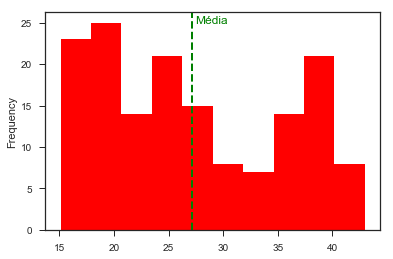

In [132]:
histogramaidade=fdf.Idade.plot.hist(color='red')
def verticalLine(histograma, x, y, color, nome):
    histogramaidade.axvline(x, color=color, linestyle="dashed", linewidth=2)
    histogramaidade.text(1.01*x, y, nome, color=color)     
verticalLine(histogramaidade, fdf.Idade.mean(), 25, "g", "Média")

#### IDH vs Média de Idade: gráfico com linha de tendência

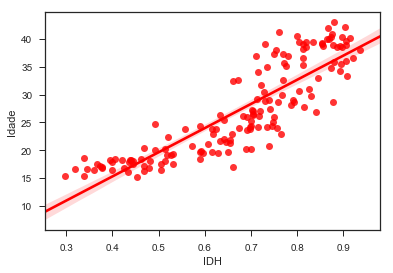

In [134]:
sns.regplot('IDH','Idade',fdf,color='red')

### 2.Análise: Veículos (carros, caminhões e ônibus a cada 1000 pessoas)

In [135]:
fdf.Veículos.corr(fdf.IDH)

0.8062395823637301

#### Podemos observar que existe uma correlação de aproximadamente 0.80, o que indica uma correlação alta. Isso é um bom indicador da influência que a quantidade de veículos tem sobre o IDH.

In [136]:
fdf.Veículos.describe()

count    144.000000
mean     210.673299
std      222.929216
min        0.295000
25%       32.150000
50%      115.000000
75%      357.500000
max      820.000000
Name: Veículos, dtype: float64

#### Histograma: Número de veículos

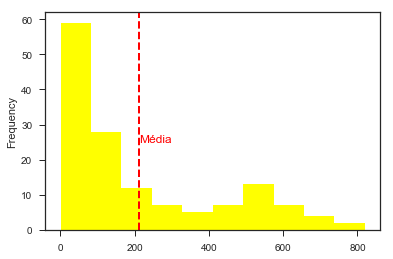

In [139]:
histogramaveic=fdf.Veículos.plot.hist(color='yellow')
def verticalLine(histograma, x, y, color, nome):
    histogramaveic.axvline(x, color=color, linestyle="dashed", linewidth=2)
    histogramaveic.text(1.01*x, y, nome, color=color)     
verticalLine(histogramaveic, fdf.Veículos.mean(), 25, "r", "Média")

#### IDH vs Número veículos: gráfico com linha de tendência

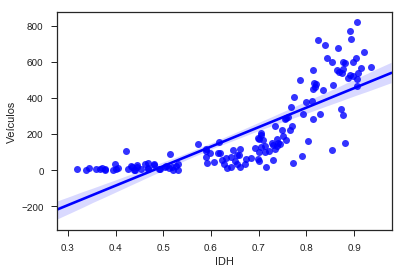

In [148]:
sns.regplot('IDH','Veículos',fdf,color='blue')

### 3.Análise: Veículos (carros, caminhões e ônibus a cada 1000 pessoas) e Média de idade

In [142]:
fdf.Veículos.corr(fdf.Idade)

0.7817131508857608

#### Podemos observar que existe uma correlação de aproximadamente 0.78, o que indica uma correlação média/alta. Isso é um indicador de uma possível influência que a média de idade tem sobre o IDH.

#### Veículos x Média de Idade

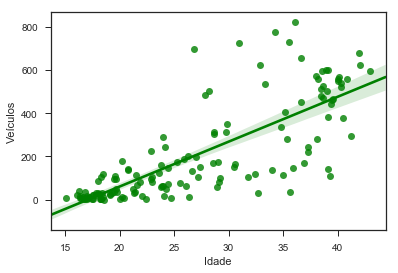

In [150]:
sns.regplot('Idade','Veículos',fdf,color='green')

In [154]:
fdf[(fdf['Veículos']>800)]

,País,Idade,IDH,Veículos
149,United States,36.1,0.905,820.0


### Conclusão

#####  A relação entre IDH e média de idade, não apresenta outliers significativos. Países com maiores idades médias, até os 43 anos, apresentam IDHs maiores. Uma das causas dessa relação é a maior inserção de pessoas no mercado de trabalho, visto que jovens geralmente apenas estudam e idosos estão menos dispostos a trabalhar. Populações com idades próximas aos 40 anos são ativas na geração de capital para o país, e economias fortes possuem IDHs maiores. 

##### A relação entre IDH e número de veículos a cada mil habitantes, apesar de possuir uma correlação alta, apresenta outliers significativos como a Singapura. Este país possuí um IDH elevado de 0.88, apesar do número pequeno de veículos se comparado com outros países que possuem IDHs próximos a este. Isso ocorre graças as políticas e taxas adotadas no país para a compra de carros. Além de preços elevados para os veículos, (um carro da Toyota, modelo Corolla novo custa 103 mil dólares) existe a necessidade de obter uma licença para utilizar carros que custa 37 mil dólares. Retomando a questão, concluí-se que o número de veículos está relacionado ao IDH tendo em mente o preço de compra e de utilização deste tipo de bem, maiores quantidades de veículos remetem a um maior poder de compra por pessoa, o que é diretamente ligado ao IDH.